# **Data Preprocessing After Applying Boost Method**

#

In [ ]:
# view the preprocessed data
df

,TT4,tumor,TSH_measured,FTI,pregnant,TSH,query_hyperthyroid,T4U,on_antithyroid_meds,query_hypothyroid,target
0,88.000000,0,1,89.000000,0,8.000000,0,0.990000,0,0,6
1,94.000000,0,1,112.000000,0,8.400000,0,0.840000,0,0,6
2,41.589273,0,1,15.948540,0,37.923830,0,1.102665,0,0,8
3,113.000000,0,1,131.000000,0,8.799999,0,0.860000,0,0,6
4,86.000000,0,1,770.343512,0,8.799999,0,0.482534,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
2596,38.765697,0,1,14.835005,0,78.528701,0,1.023874,0,0,8
2597,40.725938,0,1,22.542929,0,39.432301,0,1.103631,0,0,8
2598,23.423390,0,1,32.961240,0,98.315093,0,1.044988,0,0,8
2599,37.931742,0,1,49.993351,0,50.048981,0,1.138299,0,0,8


In [ ]:
# remove duplicates
print("Duplicates before drop:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates before drop:", df.duplicated().sum())

Duplicates before drop: 2
Duplicates before drop: 0


In [ ]:
# null counts
df.isnull().sum()

,0
TT4,0
tumor,0
TSH_measured,0
FTI,0
pregnant,0
TSH,0
query_hyperthyroid,0
T4U,0
on_antithyroid_meds,0
query_hypothyroid,0


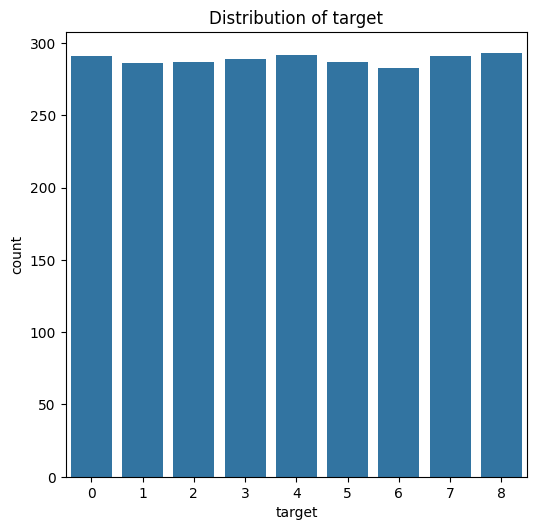

In [ ]:
# Distribution plot for target column to check the whether the data balanced or not
object_columns = ["target"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(object_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[feature], data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


# Count occurrences of each class (replace 'target' with actual column name)
class_counts = df['target'].value_counts()

# Get majority and minority class counts
majority_class = class_counts.max()
minority_class = class_counts.min()
total_samples = len(df)

# Calculate imbalance percentage
imbalance_percentage = ((majority_class - minority_class) / total_samples) * 100

# Print results
print(f"Majority Class: {majority_class}")
print(f"Minority Class: {minority_class}")
print(f"Total Samples: {total_samples}")
print(f"Imbalance Percentage: {imbalance_percentage:.2f}%")

# Check if dataset is imbalanced
if imbalance_percentage > 20:  # Typically, >20% indicates imbalance
    print("The dataset is highly imbalanced.")
else:
    print("The dataset is fairly balanced.")


Majority Class: 293
Minority Class: 283
Total Samples: 2599
Imbalance Percentage: 0.38%
The dataset is fairly balanced.


Our preprocessed data is a balanced dataset

In [ ]:
# information about preprocessde data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2599 entries, 0 to 2600
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TT4                  2599 non-null   float64
 1   tumor                2599 non-null   int64  
 2   TSH_measured         2599 non-null   int64  
 3   FTI                  2599 non-null   float64
 4   pregnant             2599 non-null   int64  
 5   TSH                  2599 non-null   float64
 6   query_hyperthyroid   2599 non-null   int64  
 7   T4U                  2599 non-null   float64
 8   on_antithyroid_meds  2599 non-null   int64  
 9   query_hypothyroid    2599 non-null   int64  
 10  target               2599 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 243.7 KB


In [ ]:
# information about preprocessed data
df.describe()

,TT4,tumor,TSH_measured,FTI,pregnant,TSH,query_hyperthyroid,T4U,on_antithyroid_meds,query_hypothyroid,target
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,94.769092,0.116583,0.844171,133.901287,0.011928,55.841952,0.103117,1.022899,0.006926,0.111966,4.005002
std,72.468663,0.320985,0.362763,145.397303,0.108581,98.416953,0.304170,0.261476,0.082948,0.315385,2.587420
min,2.000000,0.000000,0.000000,1.400000,0.000000,0.005000,0.000000,0.280000,0.000000,0.000000,0.000000
25%,33.211041,0.000000,1.000000,36.907135,0.000000,0.619315,0.000000,0.880000,0.000000,0.000000,2.000000
50%,82.000000,0.000000,1.000000,92.903485,0.000000,9.213666,0.000000,1.030000,0.000000,0.000000,4.000000
75%,137.892220,0.000000,1.000000,171.610412,0.000000,62.174089,0.000000,1.113990,0.000000,0.000000,6.000000
max,430.000000,1.000000,1.000000,817.504557,1.000000,530.000000,1.000000,1.830000,1.000000,1.000000,8.000000


In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('DATASET', exist_ok=True)

# Save the DataFrame to CSV
df.to_csv('DATASET/Final_Dataset.csv')
